### __BUSA8001 Group Assignment - Predicting Used Car Prices__

---

**Kaggle Competition Ends:** Friday, 1 Nov 2024 @ 3:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 1 Nov 2024 @ 11.59pm (Week 13)   
**Total Marks:** 30

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict prices of used cars based on car characteristics and regression models

**Instructions:**

- Form a team of 3 students
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team on Kaggle [https://www.kaggle.com/t/78dcb64267834777ae9a3d67ab573424](https://www.kaggle.com/t/78dcb64267834777ae9a3d67ab573424)
    - Team leader to click on `team` and invite other 2 team members to join
    - Your **team's name must start** with our unit code, for instance you could have a team called BUSA8001_masterful_geniuses
- All team members should work on all the tasks however   
    - Each team member will be responsible for one of the 3 tasks listed below    
- **Your predictions must be generated by a model you develop here**
    - You will receive a mark of **zero** if your code is not able produce the forecasts you submit to Kaggle

**Competition Rankings**

The rankings for the competition are determined through two different leaderboards:

- **Public Leaderboard Ranking**: Available during the competition, these rankings are calculated based on 50% of the test dataset, which includes 2,000 observations. This allows participants to see how they are performing while the competition is still ongoing.
- **Final Leaderboard Ranking**: These rankings are recalculated from the other 50% of the test dataset, which consists of the remaining 2,000 observations, and are revealed 5 minutes after the competition concludes. This final evaluation determines the ultimate standings of the competition.



**Marks**

- Assignment: 30 marks consisting of Solutions (27 marks) + Video Presentation (3 marks)
- **Each Student's Mark: 50% x overall assignment mark + 50% x mark for the task that you are responsible for**  



**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
2. On iLearn **only team leader to submit** the assignment Jupyter notebook re-named to your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and the group name Kaggle
    - One 15 minute video recording of your work
        - 5 marks will be deducted from each Task for which there is no video presentation   


---
---

**Fill out the following information**

- Team Name on Kaggle: `BUSA8001_THE THREE_MUSKERTEERS`
- Team Leader and Team Member 1: `Ngoc Quynh Anh Do`
- Team Member 2: `Ngoc Bich Nguyen`
- Team Member 3: `Shivani Mane`

---

## Task 1: Problem Description and Initial Data Analysis

**Total Marks: 9**   

Based on the Competition Overview, datasets and additional information provided on Kaggle, along with insights gained from personal research of the topic, write **Problem Description** (about 500 words) focusing on the sections listed below:
1. Forecasting Problem - explain what we are trying to do and how it could be used in the real world, e.g. who and how may benefit from it (2 marks)    
2. Evaluation Criteria - discuss the criteria that is used in this competition to assess forecasting performance in detail (2 marks)     
3. Categorise the variables provided in the dataset according to their type; Hint: similar to what we had in Programming Task 1 (2 marks)  
4. Missing Values - only explain what you find for both the training and test datasets at this stage (2 marks)
5. Provide and discuss some interesting *univariate* data characteristics (e.g. summary statistics and plots) in the training dataset  (1 marks)       
- Hints:
    - You should **not** discuss any specific predictive algorithms at this stage
  


Student in charge of this task: `Shivani Sunil Mane`

The goal of this competition is to predict used car prices based on features like mileage, make, model, year, and engine type. Accurate predictions benefit car sales, finance, and insurance by helping set fair, competitive prices. Imagine going to buy a car without knowing which one offers the best value based on price, condition, and features. Reliable price estimates reveal fair pricing, guiding better purchase decisions. Insurance companies use these values to set premiums, while banks rely on them to determine fair auto loan amounts.

The competition uses Mean Absolute Percentage Error (MAPE) as the primary evaluation metric. MAPE measures the accuracy by calculating the average of absolute percentage errors between actual and forecasted values.

This dataset includes 37 variables in the training set that describe different aspects of the cars. These can be grouped as follows:

| Variable Type  | Number of Features | Features' List |
| -------------- | ------------------ | -------------- |
| **Numeric**    | 13                 | `city_fuel_economy`, `daysonmarket`, `dealer_zip`, `engine_displacement`, `highway_fuel_economy`, `horsepower`, `latitude`, `longitude`, `mileage`, `savings_amount`, `seller_rating`, `year`, `price` |
| **Ordinal**    | 0                  |  None |
| **Nominal**    | 24                 | `vin`, `back_legroom`, `body_type`, `city`, `engine_type`, `exterior_color`, `franchise_dealer`, `front_legroom`, `fuel_type`, `height`, `interior_color`, `listed_date`, `listing_color`, `make_name`, `maximum_seating`, `model_name`, `power`, `torque`, `transmission`, `transmission_display`, `wheel_system`, `wheelbase`, `width`, `is_new` |

Looking at the data, several columns in the training and test sets have missing values, which we’ll need to handle to build a reliable model.
- **Training Dataset**: Some columns with missing data include `back_legroom`, `franchise_dealer`, `latitude`, `mileage`, `power`, `savings_amount`, `seller_rating`, and `transmission`. For example, the `mileage` column has 7,669 entries out of 8,000, meaning some entries are missing. If we don’t fill these in, it could weaken our model's performance.

- **Test Dataset**: Similar columns in the test set also have missing values, including `back_legroom`, `city_fuel_economy`, `engine_displacement`, `horsepower`, `latitude`, `mileage`, `power`, and `torque`. By identifying these patterns, we can use methods like filling in missing numbers with the median to keep data consistent.

Exploring some individual variables in the training dataset gives us helpful insights:

- **Mileage**: Most cars in the dataset have lower mileage, with only a few having high mileage, which might be linked to lower prices. To make this data more useful, we might need to adjust it so that it’s less skewed.
  
- **Horsepower**: Horsepower in this dataset varies widely, from 74 HP up to 717 HP, with an average around 247 HP. Cars with higher horsepower generally have higher prices, as they are often seen as more powerful and desirable.
  
- **Year**: Most cars are recent models, with a median production year of 2019. This reflects the high supply and demand for newer used vehicles.
  
- **Price**: The price of cars in the dataset ranges from 1,700 to 314,900 dollars with an average of about 29,018 dollars. This wide range suggests a mix of budget-friendly and luxury cars.

These observations clarify which variables may need adjustments, like normalizing skewed data, to enhance the model's performance.


In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data loading (replace 'your_dataset.csv' with your actual dataset file)
train = pd.read_csv('/kaggle/input/busa-competition/train.csv')
test = pd.read_csv('/kaggle/input/busa-competition/test.csv')

# Display the first few rows of the DataFrame to verify
train.head()
#df_test.head()



,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,JTEBU17R79K040807,34.6 in,SUV / Crossover,Blair,16.0,36,68008,4000.0,V6,White,...,1258.0,4.500000,"266 lb-ft @ 4,000 RPM",A,Automatic,4WD,109.8 in,75.2 in,2009,14800.0
1,1C4PJLCB4KD487354,40.3 in,SUV / Crossover,Mattoon,22.0,426,61938,2400.0,I4,Light Brownstone Pearlcoat,...,0.0,4.629630,"239 lb-ft @ 4,400 RPM",A,9-Speed Automatic,FWD,106.2 in,73.2 in,2019,26445.0
2,JN1CV6AR2CM674889,34.7 in,Sedan,Springfield,18.0,5,22150,3700.0,V6,Liquid Platinum,...,1024.0,3.882353,"269 lb-ft @ 5,200 RPM",A,Automatic,AWD,112.2 in,69.8 in,2012,14000.0
3,2HKRW2H21LH660837,40.4 in,SUV / Crossover,Missoula,27.0,22,59801,1500.0,I4,Obsidian Blue,...,0.0,3.888889,"179 lb-ft @ 2,000 RPM",CVT,Continuously Variable Transmission,AWD,104.7 in,73 in,2020,26293.0
4,3GTU9DED7LG361736,43.4 in,Pickup Truck,Greenville,16.0,57,75402,6200.0,V8,White Frost Tricoat,...,0.0,4.545455,"460 lb-ft @ 1,500 RPM",A,Automatic,4WD,147.4 in,81.2 in,2020,49223.0


In [2]:


# Inspecting the Train Dataset
print("Train Data Overview:")
# Display the first few rows of the training dataset to understand its structure
print(train.head())

# Getting an overview of the data types, non-null counts, and memory usage for each column
print(train.info())

# Checking for missing values in each column to identify potential data cleaning needs
print(train.isnull().sum())

# Displaying summary statistics for numerical columns in the training data
print(train.describe())

# Inspecting the Test Dataset
print("\nTest Data Overview:")
# Display the first few rows of the test dataset to understand its structure
print(test.head())

# Get an overview of data types, non-null counts, and memory usage for each column in the test dataset
print(test.info())

# Checking for missing values in each column in the test dataset
print(test.isnull().sum())

# Display summary statistics for numerical columns in the test data
print(test.describe())




Train Data Overview:
                 vin back_legroom        body_type         city  \
0  JTEBU17R79K040807      34.6 in  SUV / Crossover        Blair   
1  1C4PJLCB4KD487354      40.3 in  SUV / Crossover      Mattoon   
2  JN1CV6AR2CM674889      34.7 in            Sedan  Springfield   
3  2HKRW2H21LH660837      40.4 in  SUV / Crossover     Missoula   
4  3GTU9DED7LG361736      43.4 in     Pickup Truck   Greenville   

   city_fuel_economy  daysonmarket  dealer_zip  engine_displacement  \
0               16.0            36       68008               4000.0   
1               22.0           426       61938               2400.0   
2               18.0             5       22150               3700.0   
3               27.0            22       59801               1500.0   
4               16.0            57       75402               6200.0   

  engine_type              exterior_color  ... savings_amount seller_rating  \
0          V6                       White  ...         1258.0      4.5

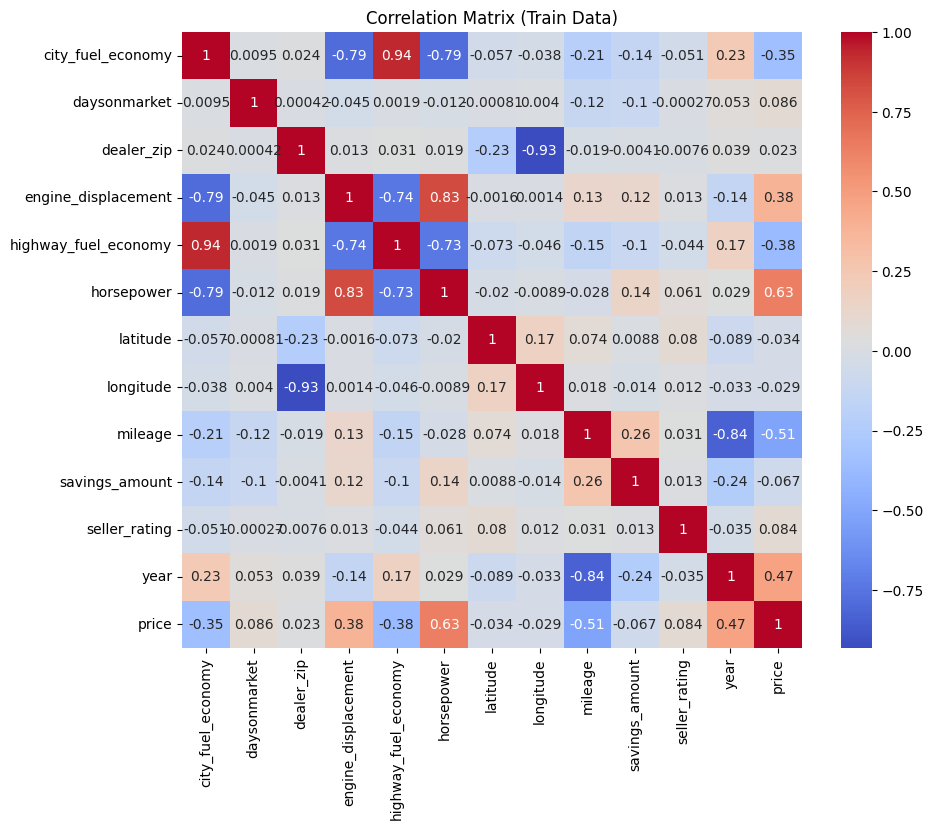

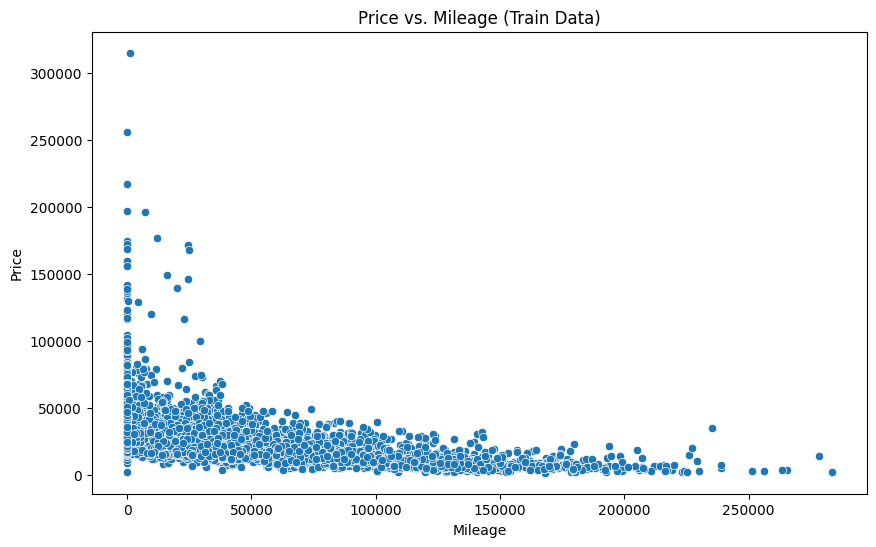

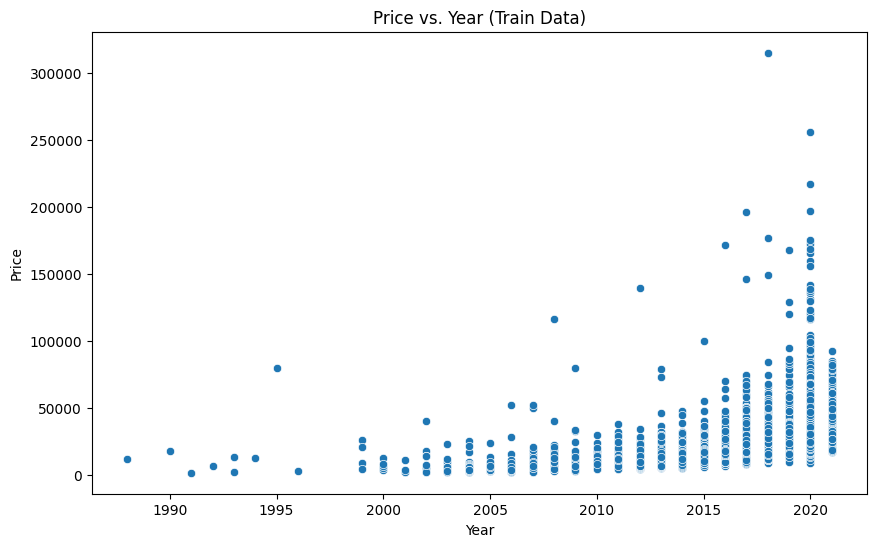

In [3]:
# Visualize Correlations in Train Data
# Filter the train dataset to include only numeric columns
numeric_train = train.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix to explore relationships between numerical features in the train dataset
correlation_matrix = numeric_train.corr()

# Plotting the correlation matrix using a heatmap for a visual representation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Train Data)')
plt.show()

# Scatter plot for Price vs Mileage in Train Data
# Plot mileage against price to observe any trends or relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=train)
plt.title('Price vs. Mileage (Train Data)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter plot for Price vs Year in Train Data
# Plot year of manufacture against price to observe any trends with car age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='price', data=train)
plt.title('Price vs. Year (Train Data)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

`(Task 1, Text Here - insert more cells as required)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering

- **Make sure you explain what you have done and why in Markdown text for each question, as well as on your video**.

**Total Marks: 9**

Student in charge of this task: `Ngoc Bich Nguyen`

**Task 2, Question 1**: Clean **all** numerical features so that they can be used in training algorithms. For instance, back_legroom feature is in object format containing both numerical values and text. Extract numerical values (equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [4]:
def clean_numerical_feature(df):
    """
    This function cleans a column by extracting numerical values from a mixed-type column
    and handling any missing or erroneous values.
    """
    # Step 1: Clean numerical values and convert to float
    numeric_columns = ['back_legroom', 'front_legroom', 'height', 'wheelbase', 'width', 'maximum_seating']

    for col in numeric_columns:
        df[col] = df[col].replace(['--', ''], np.nan)  # Replace '--' with NaN
        df[col] = df[col].astype(str).str.replace(r'[^\d.]+', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    # Convert other numeric-like columns to float, handling errors
    df ['engine_displacement'] = pd.to_numeric(df['engine_displacement'], errors='coerce')
    df['city_fuel_economy'] = pd.to_numeric(df['city_fuel_economy'], errors='coerce')

    return df

# Apply the cleaning function to the data
train_cleaned = clean_numerical_feature(train)
test_cleaned = clean_numerical_feature(test)

# Display the cleaned data types to verify
train_cleaned.head()
#test_cleaned.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,savings_amount,seller_rating,torque,transmission,transmission_display,wheel_system,wheelbase,width,year,price
0,JTEBU17R79K040807,34.6,SUV / Crossover,Blair,16.0,36,68008,4000.0,V6,White,...,1258.0,4.500000,"266 lb-ft @ 4,000 RPM",A,Automatic,4WD,109.8,75.2,2009,14800.0
1,1C4PJLCB4KD487354,40.3,SUV / Crossover,Mattoon,22.0,426,61938,2400.0,I4,Light Brownstone Pearlcoat,...,0.0,4.629630,"239 lb-ft @ 4,400 RPM",A,9-Speed Automatic,FWD,106.2,73.2,2019,26445.0
2,JN1CV6AR2CM674889,34.7,Sedan,Springfield,18.0,5,22150,3700.0,V6,Liquid Platinum,...,1024.0,3.882353,"269 lb-ft @ 5,200 RPM",A,Automatic,AWD,112.2,69.8,2012,14000.0
3,2HKRW2H21LH660837,40.4,SUV / Crossover,Missoula,27.0,22,59801,1500.0,I4,Obsidian Blue,...,0.0,3.888889,"179 lb-ft @ 2,000 RPM",CVT,Continuously Variable Transmission,AWD,104.7,73.0,2020,26293.0
4,3GTU9DED7LG361736,43.4,Pickup Truck,Greenville,16.0,57,75402,6200.0,V8,White Frost Tricoat,...,0.0,4.545455,"460 lb-ft @ 1,500 RPM",A,Automatic,4WD,147.4,81.2,2020,49223.0


In [5]:
print("Data types of test_cleaned:")
print(test_cleaned.dtypes)

Data types of test_cleaned:
vin                      object
back_legroom            float64
body_type                object
city                     object
city_fuel_economy       float64
daysonmarket              int64
dealer_zip                int64
engine_displacement     float64
engine_type              object
exterior_color           object
franchise_dealer         object
front_legroom           float64
fuel_type                object
height                  float64
highway_fuel_economy    float64
horsepower              float64
interior_color           object
is_new                     bool
latitude                float64
listed_date              object
listing_color            object
longitude               float64
make_name                object
maximum_seating         float64
mileage                 float64
model_name               object
power                    object
savings_amount          float64
seller_rating           float64
torque                   object
transmission

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 5 new features from the existing numerical variables which contain multiple items of information, for example you could extract maximum torque and torque rpm from the torque variable.  
(2 marks)

In [6]:
print(train_cleaned.columns)
print(test_cleaned.columns)

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
       'is_new', 'latitude', 'listed_date', 'listing_color', 'longitude',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'power',
       'savings_amount', 'seller_rating', 'torque', 'transmission',
       'transmission_display', 'wheel_system', 'wheelbase', 'width', 'year',
       'price'],
      dtype='object')
Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
       'is_new', 'latitude', 'listed_date', 'listing_color', 'longitude',
     

In [7]:
def extract_and_calculate_engine_specs(df):
    # 1. Extract max torque value (numeric value before 'lb-ft')
    df['max_torque_lb_ft'] = df['torque'].str.extract(r'(\d+)\s*lb-ft').astype(float)

    # 2. Extract torque RPM (numeric value between '@' and 'RPM') - more robust to spaces
    df['torque_rpm'] = df['torque'].str.extract(r'@\s*([\d,]+)\s*RPM')

    # 3. Remove commas from the extracted torque RPM and convert to float
    df['torque_rpm'] = df['torque_rpm'].str.replace(',', '').astype(float)

    # 4. Extract max power value (numeric value before 'hp')
    df['max_power_hp'] = df['power'].str.extract(r'(\d+)\s*hp').astype(float)

    # 5. Extract power RPM (numeric value between '@' and 'RPM') - more robust to spaces
    df['power_rpm'] = df['power'].str.extract(r'@\s*([\d,]+)\s*RPM')

    # 6. Remove commas from the extracted power RPM and convert to float
    df['power_rpm'] = df['power_rpm'].str.replace(',', '').astype(float)

    # 7. Calculate torque-to-power ratio
    df['torque_to_power_ratio'] = df['max_torque_lb_ft'] / df['max_power_hp']

    return df

#Apply
train_cleaned1 = extract_and_calculate_engine_specs(train_cleaned)
test_cleaned1 = extract_and_calculate_engine_specs(test_cleaned)


In [8]:
train_cleaned1.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,engine_type,exterior_color,...,wheel_system,wheelbase,width,year,price,max_torque_lb_ft,torque_rpm,max_power_hp,power_rpm,torque_to_power_ratio
0,JTEBU17R79K040807,34.6,SUV / Crossover,Blair,16.0,36,68008,4000.0,V6,White,...,4WD,109.8,75.2,2009,14800.0,266.0,4000.0,236.0,5200.0,1.127119
1,1C4PJLCB4KD487354,40.3,SUV / Crossover,Mattoon,22.0,426,61938,2400.0,I4,Light Brownstone Pearlcoat,...,FWD,106.2,73.2,2019,26445.0,239.0,4400.0,271.0,6500.0,0.881919
2,JN1CV6AR2CM674889,34.7,Sedan,Springfield,18.0,5,22150,3700.0,V6,Liquid Platinum,...,AWD,112.2,69.8,2012,14000.0,269.0,5200.0,328.0,7000.0,0.820122
3,2HKRW2H21LH660837,40.4,SUV / Crossover,Missoula,27.0,22,59801,1500.0,I4,Obsidian Blue,...,AWD,104.7,73.0,2020,26293.0,179.0,2000.0,190.0,5600.0,0.942105
4,3GTU9DED7LG361736,43.4,Pickup Truck,Greenville,16.0,57,75402,6200.0,V8,White Frost Tricoat,...,4WD,147.4,81.2,2020,49223.0,460.0,1500.0,277.0,3750.0,1.660650


In [9]:
print(train_cleaned1.columns)
print(test_cleaned1.columns)


Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
       'is_new', 'latitude', 'listed_date', 'listing_color', 'longitude',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'power',
       'savings_amount', 'seller_rating', 'torque', 'transmission',
       'transmission_display', 'wheel_system', 'wheelbase', 'width', 'year',
       'price', 'max_torque_lb_ft', 'torque_rpm', 'max_power_hp', 'power_rpm',
       'torque_to_power_ratio'],
      dtype='object')
Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'i

In [10]:
# Drop the original 'torque' and 'power' columns
train_cleaned1.drop(['torque'], axis=1, inplace=True)
train_cleaned1.drop(['power'], axis=1, inplace=True)

test_cleaned1.drop(['torque'], axis=1, inplace=True)
test_cleaned1.drop(['power'], axis=1, inplace=True)

In [11]:
print(train_cleaned1.columns)
print(test_cleaned1.columns)

Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
       'is_new', 'latitude', 'listed_date', 'listing_color', 'longitude',
       'make_name', 'maximum_seating', 'mileage', 'model_name',
       'savings_amount', 'seller_rating', 'transmission',
       'transmission_display', 'wheel_system', 'wheelbase', 'width', 'year',
       'price', 'max_torque_lb_ft', 'torque_rpm', 'max_power_hp', 'power_rpm',
       'torque_to_power_ratio'],
      dtype='object')
Index(['vin', 'back_legroom', 'body_type', 'city', 'city_fuel_economy',
       'daysonmarket', 'dealer_zip', 'engine_displacement', 'engine_type',
       'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'interior_color',
   

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute the missing values for all features in both the training and test datasets.   
(2 marks)

In [12]:
## Task 2, Question 3 Code Here

def impute_missing_values(df):
    """
    This function imputes missing values for numerical and categorical features
    within a single dataset (either train or test).
    """
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical features
            df[column] = df[column].fillna(df[column].mode()[0])
        elif df[column].dtype == 'bool':  # Boolean features
            df[column] = df[column].fillna(df[column].mode()[0])
        else:  # Numerical features
            df[column] = df[column].fillna(train_cleaned1[column].mean())
    return df

# Impute missing values separately for train and test datasets
train_cleaned2 = impute_missing_values(train_cleaned1)
test_cleaned2 = impute_missing_values(test_cleaned1)

# Check for missing values (optional)
print(train_cleaned2.isnull().sum())  # Check for remaining missing values in training set
print(test_cleaned2.isnull().sum())   # Check for remaining missing values in test set

vin                      0
back_legroom             0
body_type                0
city                     0
city_fuel_economy        0
daysonmarket             0
dealer_zip               0
engine_displacement      0
engine_type              0
exterior_color           0
franchise_dealer         0
front_legroom            0
fuel_type                0
height                   0
highway_fuel_economy     0
horsepower               0
interior_color           0
is_new                   0
latitude                 0
listed_date              0
listing_color            0
longitude                0
make_name                0
maximum_seating          0
mileage                  0
model_name               0
savings_amount           0
seller_rating            0
transmission             0
transmission_display     0
wheel_system             0
wheelbase                0
width                    0
year                     0
price                    0
max_torque_lb_ft         0
torque_rpm               0
m

/tmp/ipykernel_17/2845138326.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0])


`(Task 2, Question 3 Text Here - insert more cells as required)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class.

- Where multiple values are given for an observation encode the observation as 'other'.
- Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, if appropriate, you could all map colours into {red, yellow, green, blue, purple, other} and then encode.  
(2 marks)

In [13]:
# Add a flag to distinguish between train and test after combining
train_cleaned2['is_train'] = 1
test_cleaned2['is_train'] = 0

# Combine the datasets
combined_df = pd.concat([train_cleaned2, test_cleaned2], ignore_index=True)

#Drop the 'vin' column
combined_df = combined_df.drop(columns=['vin'], errors='ignore')

# Split entries with multiple values and replace with 'other'
#combined_df[col] = combined_df[col].apply(lambda x: 'other' if ',' in str(x) else x)

In [14]:
import pandas as pd
import re

# Define regex patterns for common color keywords
main_colors_regex = {
    'red': re.compile(r'red', re.IGNORECASE),
    'blue': re.compile(r'blue', re.IGNORECASE),
    'green': re.compile(r'green', re.IGNORECASE),
    'yellow': re.compile(r'yellow', re.IGNORECASE),
    'black': re.compile(r'black', re.IGNORECASE),
    'white': re.compile(r'white', re.IGNORECASE),
    'gray': re.compile(r'gray|grey', re.IGNORECASE),
    'metallic': re.compile(r'metallic', re.IGNORECASE),
    'silver': re.compile(r'silver', re.IGNORECASE)
}

# Step 1: Extract the most frequently appeared color
def extract_primary_colors(df, color_columns):
    color_counts = {}

    for col in color_columns:
        df[f'extracted_{col}'] = df[col].apply(lambda x: next(
            (color for color, pattern in main_colors_regex.items() if pattern.search(str(x))),
            'other'
        ))

        # Count frequencies of each extracted color
        for color in df[f'extracted_{col}']:
            color_counts[color] = color_counts.get(color, 0) + 1

    return color_counts

# Get color frequencies
color_columns = ['interior_color', 'exterior_color', 'listing_color']
color_counts = extract_primary_colors(combined_df, color_columns)

# Identify the top 5 most frequent colors
top_colors = sorted(color_counts, key=color_counts.get, reverse=True)[:5]

# Step 2: Create a mapping dictionary with top 5 colors + 'other'
color_mapping = {color: [color] for color in top_colors}
color_mapping['other'] = ['other']

# Step 3: Map colors in original columns to top colors + 'other'
def map_colors_to_top(df, color_columns, color_mapping):
    # Inverse mapping for easy lookup
    color_map_inverse = {variant: color for color, variants in color_mapping.items() for variant in variants}

    for col in color_columns:
        # Apply mapping
        df[col] = df[f'extracted_{col}'].map(color_map_inverse).fillna('other')

    # Drop extracted columns after mapping
    df.drop(columns=[f'extracted_{col}' for col in color_columns], inplace=True)
    return df

# Apply the mapping to get standardized colors
combined_encoded = map_colors_to_top(combined_df, color_columns, color_mapping)

# Check the result
print(combined_encoded[color_columns].head())
#combined_encoded.info()

  interior_color exterior_color listing_color
0          black          white         white
1          black          other         other
2          other          other          gray
3           gray          other         other
4          white          white         white


In [15]:
## Task 2, Question 4 Code Here
#Encode freatures
def encode_categorical_features(df):
    """
    This function encodes categorical features by:
    - Replacing observations with multiple values as 'other'.
    - For features with more than 5 unique values, keeps the top 5 most frequent values and maps the rest to 'other'.
    - Uses one-hot encoding or label encoding as needed for the transformed categories.
    """
    for column in df.columns:
        if df[column].dtype == 'object':
            # Step 1: Replace observations with multiple values with 'other'
            df[column] = df[column].apply(lambda x: 'other' if isinstance(x, str) and ',' in x else x)

            # Step 2: Map to the top 5 most frequent values + 'other' if unique values exceed 5
            if df[column].nunique() > 5:
                top_5_values = df[column].value_counts().index[:5]
                df[column] = df[column].apply(lambda x: x if x in top_5_values else 'other')

            # Step 3: Encode the categorical values
            df = pd.get_dummies(df, columns=[column], prefix=column, drop_first=True)

    return df

# Encode categorical features separately for train and test datasets
combined_encoded1 = encode_categorical_features(combined_encoded)

# Optional: Check the result of encoding
combined_encoded1.head()
#combined_encoded1.info()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,front_legroom,height,highway_fuel_economy,horsepower,...,transmission_M,transmission_display_8-Speed Automatic,transmission_display_9-Speed Automatic,transmission_display_Automatic,transmission_display_Continuously Variable Transmission,transmission_display_other,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,34.6,16.0,36,68008,4000.0,True,41.8,71.1,20.0,236.0,...,False,False,False,True,False,False,False,False,False,False
1,40.3,22.0,426,61938,2400.0,True,41.1,65.7,31.0,180.0,...,False,False,True,False,False,False,False,False,True,False
2,34.7,18.0,5,22150,3700.0,True,43.9,57.8,25.0,328.0,...,False,False,False,True,False,False,False,True,False,False
3,40.4,27.0,22,59801,1500.0,True,41.3,66.5,32.0,190.0,...,False,False,False,False,True,False,False,True,False,False
4,43.4,16.0,57,75402,6200.0,True,44.5,75.5,22.0,420.0,...,False,False,False,True,False,False,False,False,False,False


In [16]:
# Separate the datasets again
train_encoded1 = combined_encoded1[combined_encoded1['is_train'] == 1].drop(columns=['is_train'])
test_encoded = combined_encoded1[combined_encoded1['is_train'] == 0].drop(columns=['is_train'])

# Drop the target column 'price' from the test set (if it was added during encoding)
test_encoded1 = test_encoded.drop(columns=['price'], errors='ignore')

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.  
(1 marks)

In [17]:
## Task 2, Question 5 Code Here
# Function to convert Boolean columns to binary format
def convert_boolean_to_binary(df):
    # Identify Boolean columns
    bool_columns = df.select_dtypes(include='bool').columns

    # Convert Boolean columns to integer (binary) format
    df[bool_columns] = df[bool_columns].astype(int)

    return df

# Apply the conversion to both training and testing data
train_encoded2 = convert_boolean_to_binary(train_encoded1)
test_encoded2 = convert_boolean_to_binary(test_encoded1)

# Inspect the result
#print(train_encoded2.head())
#print(test_encoded2.head())

In [18]:
train_encoded2.head()

,back_legroom,city_fuel_economy,daysonmarket,dealer_zip,engine_displacement,franchise_dealer,front_legroom,height,highway_fuel_economy,horsepower,...,transmission_M,transmission_display_8-Speed Automatic,transmission_display_9-Speed Automatic,transmission_display_Automatic,transmission_display_Continuously Variable Transmission,transmission_display_other,wheel_system_4X2,wheel_system_AWD,wheel_system_FWD,wheel_system_RWD
0,34.6,16.0,36,68008,4000.0,1,41.8,71.1,20.0,236.0,...,0,0,0,1,0,0,0,0,0,0
1,40.3,22.0,426,61938,2400.0,1,41.1,65.7,31.0,180.0,...,0,0,1,0,0,0,0,0,1,0
2,34.7,18.0,5,22150,3700.0,1,43.9,57.8,25.0,328.0,...,0,0,0,1,0,0,0,1,0,0
3,40.4,27.0,22,59801,1500.0,1,41.3,66.5,32.0,190.0,...,0,0,0,0,1,0,0,1,0,0
4,43.4,16.0,57,75402,6200.0,1,44.5,75.5,22.0,420.0,...,0,0,0,1,0,0,0,0,0,0


`(Task 2, Question 5 Text Here - insert more cells as required)`

---
## Task 3: Fit and tune a forecasting model, submit predictions & win competition

**Total Marks: 9**

For this task, you should not create any new features and must rely on the variables constructed in Task 2.  


1. Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings. (2 marks)

2. Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)
   
3. Train the models and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)   

4. Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

5. Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)   

- Hints:
    - Make sure your Python code works so that your results can be replicated by the marker
    - You will receive the mark of zero for this Task if your code does not produce the forecasts uploaded to Kaggle
    - Make sure you clearly explain each step you do both in Markdown and on the recoded video  



Student in charge of this task: `Ngoc Quynh Anh Do`

**Task 3, Question 1**: Perform some EDA to measure the relationship between the features and the target variable, and carefully explain your findings.  (2 marks)

In [19]:
#Task 3 code here
train_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 85 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   back_legroom                                             8000 non-null   float64
 1   city_fuel_economy                                        8000 non-null   float64
 2   daysonmarket                                             8000 non-null   int64  
 3   dealer_zip                                               8000 non-null   int64  
 4   engine_displacement                                      8000 non-null   float64
 5   franchise_dealer                                         8000 non-null   int64  
 6   front_legroom                                            8000 non-null   float64
 7   height                                                   8000 non-null   float64
 8   highway_fuel_economy             

In [20]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define target and features
target_column = 'price'  # Replace with the actual target column name
X_train = train_encoded2.drop(columns=[target_column])
y_train = train_encoded2[target_column]
X_test = test_encoded2

#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

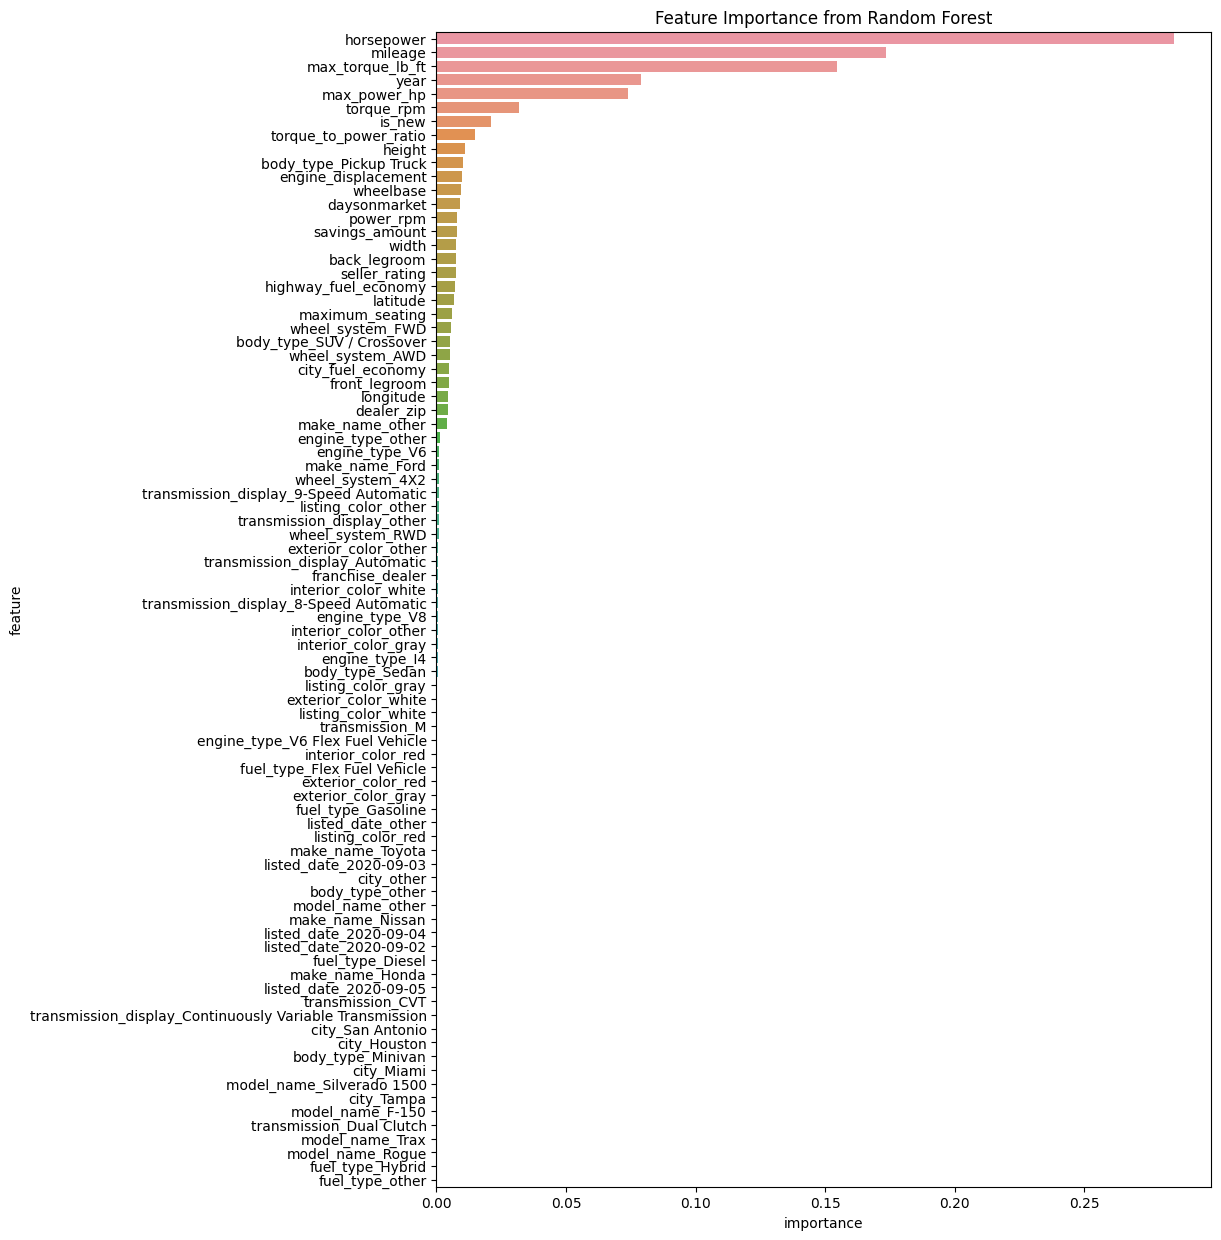

In [21]:
#Feature Importance with Random Forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
importances = RandomForestRegressor().fit(X_train_scaled, y_train).feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train_scaled.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 15))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

This feature importance plot from a Random Forest model gives insights into how different features impact the target variable, 'price.' 

1. **Top Influencers**:
   - **Horsepowe, nd **max torque (lb-ft, **Mileage** and **Year**)** are the most influential featuces. This makes sense as these attributes often correlate with engine power and performancwhile lower mileage generally suggests less wear and tear and 'Year' suggest newer models of a car rangelesls.

2. **Mid-Level Influencers**:
   - **Max power (hp)** and **torque at specific RPM (torque_rpm)** are other power-related features that moderately impact price, suggesting that various aspects of engine performance influence a car's value.
   - **Is new**: Whether a vehicle is new also significantly impacts price, as new vehicles tend to be priced higher than used ones.
   - **Vehicle type and size** factors, like **body type (Pickup/Truck)**, **height**, **engine displacement**, and **wheelbase**, show moderate importance, suggesting that certain types and sizes of vehicles may be more expensive.

3. **Low-Level Influencers**:
   - Factors like **seller rating**, **days on market**, **fuel economy** (both city and highway), and **latitude/longitude** play a smaller role. These features might reflect regional pricing variations, demand trends, or fuel efficiency’s minor influence on vehicle pricing.

4. **Least Influential**:
   - Features like **exterior color**, **listing color**, **transmission type**, and **fuel type** have minimal impact. These factors may still contribute to pricing differences, but their effects are less prominent in the model, possibly because these choices don’t strongly influence a vehicle’s base value.

In summary, performance and age-related features are the main drivers of price, while aesthetic or region-based attributes have less influence. This distribution of feature importance helps clarify which aspects should be prioritized in pricing strategies or further model tuning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

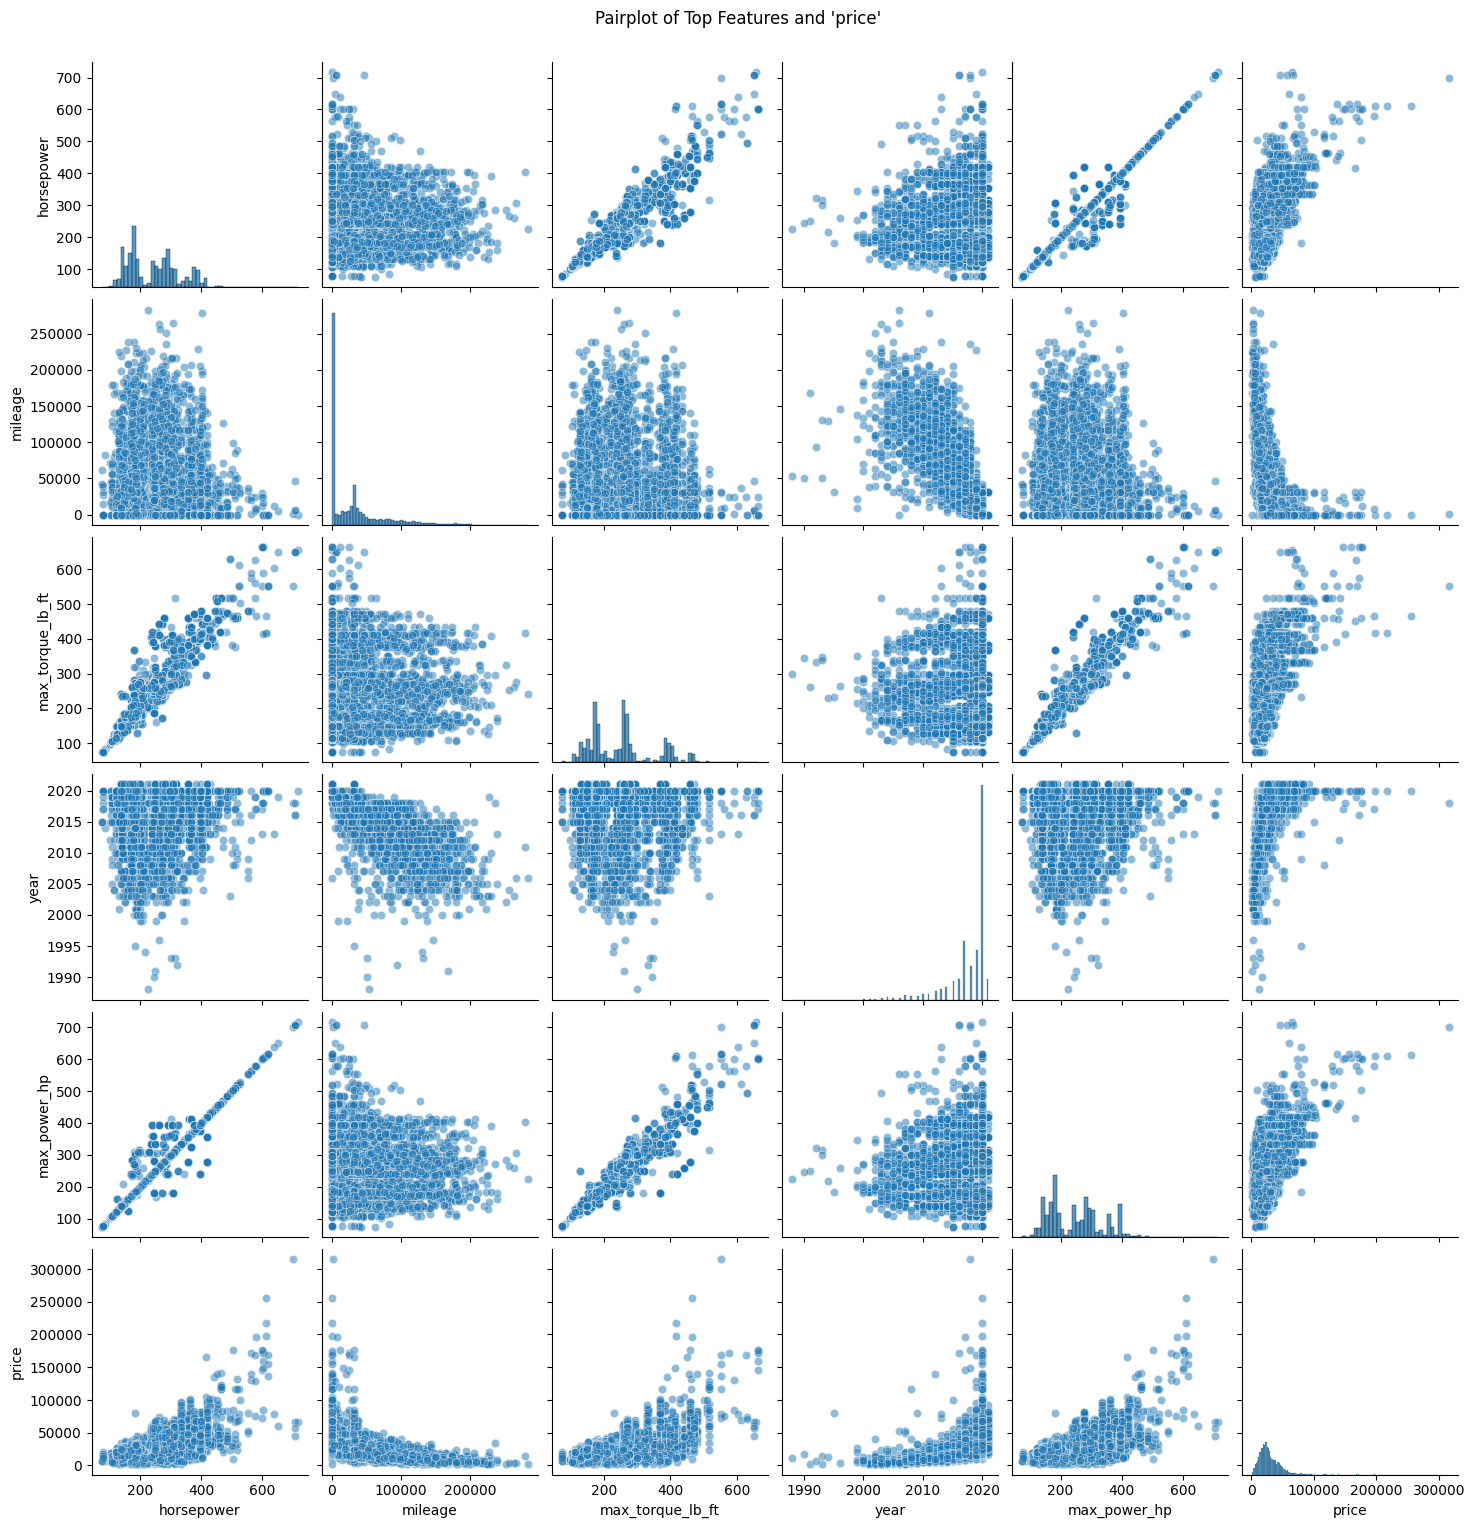

In [22]:
# Pairplot to inspect interactions among top features (selected based on importance)
top_features = feature_importance_df['feature'].head(5).tolist()  # For example, the top 5 important features
sns.pairplot(train_encoded2[top_features + ['price']], kind='scatter', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Top Features and 'price'", y=1.02)
plt.show()

This pairplot provides a visual overview of relationships between 'price' and several top features, as well as the interactions among the features themselves. 

1. **Horsepower vs. Price**:
   - There is a positive correlation between horsepower and price. As horsepower increases, the price tends to increase as well, though the relationship becomes less consistent at higher horsepower levels. This suggests that higher-performance vehicles generally command higher prices.

2. **Max Torque (lb-ft) vs. Price**:
   - Similar to horsepower, max torque also has a positive relationship with price, indicating that vehicles with higher torque values are often more expensive. This trend is particularly visible in the lower to mid-range of torque values.

3. **Mileage vs. Price**:
   - There’s a noticeable inverse relationship between mileage and price. Higher mileage vehicles tend to have lower prices, which is expected as high mileage typically indicates more usage until lising date and wear, reducing the vehicle’s value.

4. **Year vs. Price**:
   - A positive trend is visible between year and price,modelswer vehicles generally being priced higher. This aligns with the notion that newer models are often more valuable due to better features, performance, and reliability.

5. **Max Power (hp) vs. Other Performance Metrics**:
   - Max power (hp) is strongly correlated with both horsepower and max torque, which is expected as these metrics all relate to the engine’s output capabilities. This close correlation shows that engines with high horsepower usually also have high torque and power ratings.

6. **Distributions**:
   - The diagonal plots show the distribution of each variable. The price distribution is skewed, with most prices clustering at the lower end and only a few at the higher end. Mileage also has a right-skewed distribution, meaning most vehicles in the dataset have relatively low to moderate mileage.

Overall, this pairplot confirms the importance of horsepower, max torque, mileage, and year as influential factors for vehicle pricing, as seen in the feature importance plot from the Random Forest model.

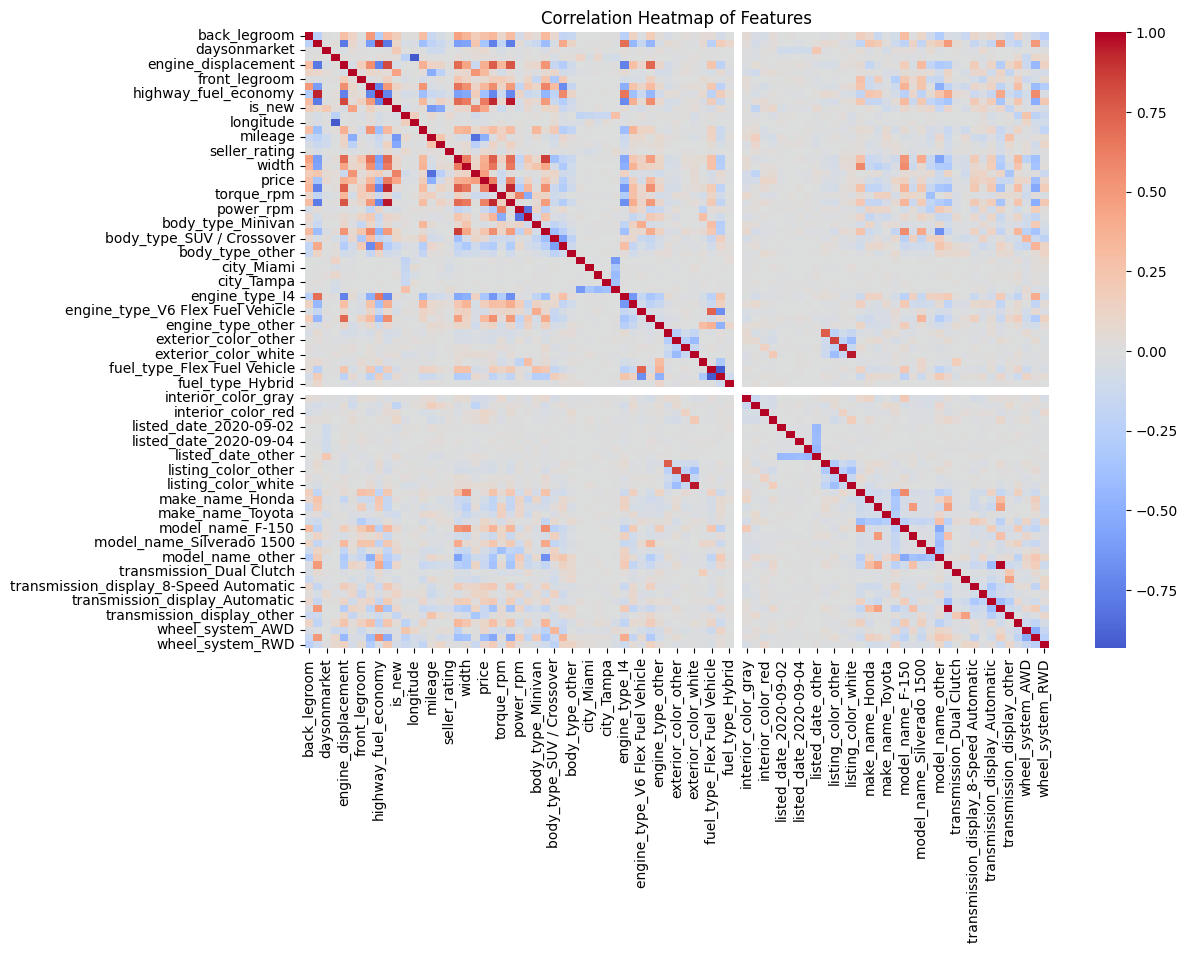

In [23]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

train_encoded2.corr()

# Plot heatmap of the correlation matrix
corr_matrix = train_encoded2.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show()

This correlation heatmap shows the relationships between various features in the dataset.


1. **Diagonal Line of Perfect Correlation**: The dark red diagonal line represents a perfect correlation of 1, as each feature is perfectly correlated with itself.

2. **Clustered Correlations**: Some sections of the heatmap have clusters of high correlation, where multiple features seem interrelated. For instance:
   - **Vehicle Characteristics**: Attributes like `engine_displacement`, `torque_rpm`, `power_rpm`, and `price` likely show some level of correlation, as they pertain to the engine and performance of the vehicle.
   - **Geographic and Market Features**: Features such as `city_Miami`, `city_Tampa`, `daysonmarket`, and `mileage` may show patterns indicating market-specific tendeec3ease.

4. **Binary or One-Hot Encoded FeSince ctures**: Categorical features such as `body_type_SUV / Crossover`, `make_name_Toyota`, or `exterior_color_are likely one-h, theyded. These are expected to show sparse, low correlations with many other f4atures.

5. **Weak Correlations**: The majority of off-diagonal elements are faint, suggesting that many features are not strongly correlated with each other. This could indicate that most features contribute independently to the dataset's structure, which might be helpful in modeling without multicollinearl free to ask!

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


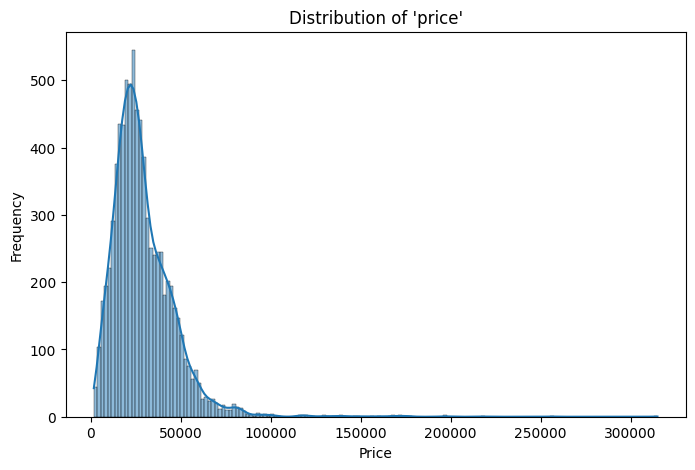

In [24]:
#Distribution of Price
plt.figure(figsize=(8, 5))
sns.histplot(train_encoded2['price'], kde=True)
plt.title("Distribution of 'price'")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The distribution of the "price" variable in this histogram appears to be right-skewed, meaning there is a long tail of higher values to the right. : The majority of vehicles are priced below $50,000with a sharp peak around this range. This indicates that most vehicles in the dataset are in the lower to mid-range price bracket.

However, there is a much lower, frequency of higher $100,000,to h300,000,  ail sugingests that there are a few high-end or luxury vehicles in the datase1.

3. **Potential Outliers**: The small number of vehicles priced above $100,000 could represent outliers or special cases (e.g., luxury or rare vehicles), which may need special attentifuturein any modeling or analysis to avoid skewed results.

4. **Non-Normal Distribution**: The right-skewed distribution indicates that the data is not normally diskewness.

This distribution is typical for datasets involving prices, where there are many affordable or mid-range options and fewer high-end items.

**Task 3, Question 2**: Choose and carefully explain 3 different machine learning (ML) regression models that you will apply in this competition. (2 marks)

-

### 1. **Decision Tree Regression**
A Decision Tree is a simple and interpretable model that segments data into branches based on feature values to make predictions.

- **How it wo  The model splits the data at different feature values to minimize prediction errors at each step. Each split is chosen to maximize the reduction in prediction variance, aiming to divide the data so that each subset (or "leaf") is as homogeneous as possible in terms of the target variable (like 'price' in this case). The final prediction is the average value of the target in each leaf node.dorest or XGBoost.

---

### 2. **Random Forest Regression**
Random Forest is an ensemble model that builds multiple decision trees and averages their predictions for better accuracy and robustness.

- **How it works**: 
  - A Random Forest creates multiple decision trees (often hundreds) using bootstrapped samples from the original data. For each tree, it randomly selects a subset of features to consider for each split. This randomness reduces correlation between trees and increases the model’s ability to generalize.
  - At the end, the predictions from all trees are averaged to give a final prediction, reducing varia
and the cpredictions without extensive tuning.

---

### 3. **XGBoost Regression**
XGBoost (Extreme Gradient Boosting) is a powerful and efficient implementation of gradient boosting that creates an ensemble of decision trees sequentially. It’s particularly known for its speed and performance in competitions.

- **How it works**:
  - XGBoost builds trees sequentially, with each new tree trying to correct the errors made by the previous trees. It uses gradient boosting, where errors are minimized using gradient descent. Instead of relying on bootstrapping like Random Forest, XGBoost optimizes each tree to reduce residual errors from the previous trees.
  - It includes advanced regularization (L1 and L2) to control overfitting and makes efficient use of resources through techniques like parallel pts, which might be essential for precise price prediction.

---

### **Comparison Summary**

| Model                   | Complexity | Interpretability | Tendency to Overfit | Performance on Complex Data | Training Speed |
|-------------------------|------------|------------------|----------------------|-----------------------------|----------------|
| Decision Tree Regression | Low        | High            | High                 | Moderate                    | Fast           |
| Random Forest Regression | Moderate   | Moderate        | Moderate             | High                        | Moderate       |
| XGBoost Regression      | High       | Moderate        | Low (with tuning)    | Very High                   | Slower         |

In summary:
- **Decision Tree Regression** is great for simple, interpretable models but may overfit.
- **Random Forest Regression** offers a balance of accuracy and interpretability with better generalization.
- **XGBoost Regression** is the most powerful but requires careful tuning and can be computationally expensive.

For this competition, **Random Forest** and **XGBoost** are strong choices, with XGBoost being especially advantageous if you’re aiming for the best accuracy. are strong choices, with XGBoost being especially advantageous if you’re aiming for the best accuracy.

In [25]:
# Random Forest Model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_train_scaled)
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print("Random Forest Model:")
print(f"Mean Squared Error: {mse_rf:.3f}")
print(f"R^2 Score: {r2_rf:.3f}\n")

Random Forest Model:
Mean Squared Error: 4065347.712
R^2 Score: 0.987



In [26]:
# Decision Tree Model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree.predict(X_train_scaled)
mse_dt = mean_squared_error(y_train, y_pred_dt)
r2_dt = r2_score(y_train, y_pred_dt)
print("Decision Tree Model:")
print(f"Mean Squared Error: {mse_dt:.3f}")
print(f"R^2 Score: {r2_dt:.3f}\n")


Decision Tree Model:
Mean Squared Error: 3925.728
R^2 Score: 1.000



In [27]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Initialize XGBoost Regressor
xgboost_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgboost_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgboost_regressor.predict(X_train_scaled)
xgb_predictions = xgboost_regressor.predict(X_test_scaled)

# Evaluate with MSE
xgb_mse = mean_squared_error(y_train, y_pred_xgb)
print(f"Training MSE: {xgb_mse:.3f}")
r2_xgb = r2_score(y_train, y_pred_xgb)
print(f"R^2 Score: {r2_xgb:.3f}\n")

# Prepare the submission DataFrame
#xgb_submission = pd.DataFrame({
    #'vin': df_test['vin'],
    #'price': xgb_test_predictions
#})

# Save the submission file as a CSV
#xgb_submission.to_csv('xgb_submission.csv', index=False)

Training MSE: 3564151.338
R^2 Score: 0.988



**Task 3, Question 3**: Train the models and tune their hyperparameters via cross-validation. Discuss the fitted weights, optimised hyperparameter values, and their training dataset predictive performance. (2 marks)

In [28]:
# 2. Random Forest Model with GridSearchCV
pipe_rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
gs_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, scoring='r2', refit=True, cv=5, n_jobs=-1, verbose=2)
gs_rf.fit(X_train_scaled, y_train)
print("Random Forest Model:")
print(f"Best Parameters: {gs_rf.best_params_}")

# Get the best model and compute accuracy on training set
best_rf = gs_rf.best_estimator_
print(f"Best Accuracy: {best_rf.score(X_train_scaled, y_train):.3f}")

# Predict prices on the test dataset
#test_predictions_rf = best_rf.predict(X_test_scaled)

# Prepare the submission DataFrame
#rf_submission1 = pd.DataFrame({
    #'vin': df_test['vin'],
    #'price': test_predictions_rf
#})

# Save the submission file as a CSV
#rf_submission1.to_csv('rf_submission1.csv', index=False)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Random Forest Model:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.987


In [29]:
# 3. Decision Tree Model with Cross-Validation for Hyperparameter Tuning
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
decision_tree = DecisionTreeRegressor(random_state=42)
dt_grid_search = GridSearchCV(decision_tree, dt_params, cv=5, scoring='r2', n_jobs=-1)
dt_grid_search.fit(X_train_scaled, y_train)
print("Decision Tree Model:")
print("Best Hyperparameters:", dt_grid_search.best_params_)

# Get the best model and compute accuracy on training set
best_dt = dt_grid_search.best_estimator_
print(f"Best Accuracy: {best_dt.score(X_train_scaled, y_train):.3f}")

# Predict prices on the test dataset
test_predictions_dt = best_dt.predict(X_test_scaled)

# Prepare the submission DataFrame
#dt_submission1 = pd.DataFrame({
    #'vin': df_test['vin'],
    #'price': test_predictions_dt

# Save the submission file as a CSV
#dt_submission1.to_csv('dt_submission1.csv', index=False)

Decision Tree Model:
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.937


In [30]:
# Set up parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgboost_regressor, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV on training data
xgb_grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_xgboost = xgb_grid_search.best_estimator_
print("Best Parameters:", xgb_grid_search.best_params_)
print(f"Best Accuracy: {best_xgboost.score(X_train_scaled, y_train):.3f}")

# Make predictions with the best model
best_xgb_predictions = best_xgboost.predict(X_test_scaled)

# Prepare the submission DataFrame
#best_xgb_submission1 = pd.DataFrame({
    #'vin': df_test['vin'],
    #'price': best_xgb_predictions
#})

# Save the submission file as a CSV
#best_xgb_submission1.to_csv('best_xgb_submission1.csv', index=False)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Accuracy: 0.986


ure.

---

### 2. **Optimized Hyperparsts and XGBoost.
  
- **Key Hyperparameters to Tune**:
  - **Decision Trees**: 
    - `max_depth`: Maximum depth of the tree. Limiting depth reduces overfitting.
    - `min_samples_split`: Minimum samples required to split a node. Higher values reduce overfitting.
    - `min_samples_leaf`: Minimum samples in a leaf node, controlling leaf size.
  - **Random Forests**:
    - `n_estimators`: Number of trees in the forest. More trees generally improve accuracy but increase training time.
    - `max_depth`, `min_samples_split`, and `min_samples_leaf`: Similar to Decision Trees, these control the structure of each tree in the forest.
    - `max_features`: Maximum number of features considered for each split. Reducing this can prevent overfitting.
  - **XGBoost**:
    - `n_estimators`: Number of trees in the model.
    - `max_depth`: Maximum depth of each tree, controlling the complexity of the model.
    - `learning_rate` (or `eta`): Controls how much each tree contributes to the model. Smaller values make training more gradual and can reduce overfitting.
    - `subsample`: Fraction of samples used to grow each tree, helping to prevent overfitting.
    - `colsample_bytree`: Fraction of features to be used for each tree, aiding regularization.
    - `gamma`: Minimum loss reduction required for a split, controlling tree structure.
    - `alpha` and `lambda`: Regularization terms (L1 and L2s into which variables drive the target variable ('price').
- **Optimized hyperparameters** will ensure each model performs as effectively as possible without ovalso generalizes effectively to unseen data in the competition.

**Task 3, Question 4**: Select your best model, create predictions of the test dataset and submit your forecasts on Kaggle's competition page. Provide Kaggle ranking and score (screenshots) and comment on your performance in the competition. (2 marks)

We choose XGBoost as our best model. XGBoost is a powerful model, especially when it comes to handling complex datasets with subtle patterns. With its advanced regularization and gradient-boosting techniques, it should provide strong predictive performance for the price prediction task. 

**Task 3, Question 5**: Suggest ways to improve your ranking and implement them, providing further evidence from Kaggle (screenshots). (1 mark)

We use stacking regressor to improve the performance.
the meta-model. Cross-validation (`cv=5`) is used to obtain out-of-fold predictions.

---

### Benefits of Stacking
- **Improved Generalization**: Stacking leverages the strengths of multiple models, which can improve the model’s ability to generalize to new data.
- **Better Performance**: The meta-model can learn how to combine predictions from each base model effectively, leading to improved accuracy.
- **Flexibility**: You can incorporate various model types, handling both linear and non-linear relationships effectively.

By implementing stacking, you should see an improvement in predictive accuracy, which could boost your ranking in the competition. Let me know if you’d like more help with the details or need assistance with specific stacking strategies!

In [31]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

# Initialize base models
base_models = [
    ('random_forest', best_rf),
    ('decision_tree', best_dt),
    ('knn', KNeighborsRegressor())
]

# Initialize meta-model
meta_model = Ridge()

# Combine models in a Stacking Regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the Stacking Regressor on the training data
stacking_regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred_stacking = stacking_regressor.predict(X_train_scaled)
stacking_test_predictions = stacking_regressor.predict(X_test_scaled)

# Evaluate with MSE
stacking_mse = mean_squared_error(y_train, y_pred_stacking)
print(f"Stacking Regressor Training MSE: {stacking_mse:.3f}")
r2_stacking = r2_score(y_train, y_pred_stacking)
print(f"R^2 Score: {r2_stacking:.3f}\n")

# Prepare the submission DataFrame
#stacking_submission = pd.DataFrame({
    #'vin': df_test['vin'],
    #'price': stacking_test_predictions
#})

# Save the submission file as a CSV
#stacking_submission.to_csv('stacking_submission.csv', index=False)

Stacking Regressor Training MSE: 4182893.826
R^2 Score: 0.986



`(Task 3 - insert more cells as required)`

---
---
## Marking Criteria

To receive full marks your solutions must satisfy the following criteria:

- Problem Description: 9 marks
- Data Cleaning: 9 marks
- Building Forecasting models: 9 marks
- Video Presentation: 3 marks
    - Duration less than 15 min, presentation skill and content
    - Each team member delivers a 5-minute presentation on their assigned task
    - All assignment questions must be discussed on video  
    - Your code must be readable on the video
    - Discuss both the actions you took and, more importantly, the reasoning behind these actions, explaining the significance of key steps
    - During the video recording, make sure that both your face and Jupyter Notebook are clearly visible
- Forecasts correctly uploaded to Kaggle
- Python code is clean and concise
- Written explanations are provided in clear and easy to understand sentences
- The assignment notebook is well-organised and easy to follow
- Failure to meet the above marking criteria will result in a deduction of marks

---
---